# Inaugural Project

Imports and set magics:

In [119]:
# a. import the required packeges 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# b. autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# c. import py.file with functions
import inauguralproject as HSM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Question 1

We use the class to find how $\frac{H_F}{H_M}$ changes when varying $\alpha$ $\in$ {0.25, 0.50, 0.75} and $\sigma =$ {0.5, 1.0, 1.5}

In [120]:
# a. define the model 
model = HSM.HouseholdSpecializationModelClass()

# b. define alpha and sigma 
alpha_vector = [0.25,0.5,0.75]
sigma_vector = [0.5, 1, 1.5]

# c. create a dataframe where the alphas are the columns and sigmas are the indexes/rows 
df = pd.DataFrame(columns= alpha_vector, index= sigma_vector)

# d. for every alpha we loop over every sigma and use the 'solve_discrete' to extract HF and HM
for i in alpha_vector:
    for j in sigma_vector:
        # i. add alpha_i to model 
        model.par.alpha = i
        # ii. add sigma_j to model 
        model.par.sigma = j
        # iii. solve the model 
        results = model.solve_discrete()
        # iv. find the ratio 
        ratio = results.HF/results.HM
        # v. add the ratio to the dataframe 
        df.loc[j,i] = ratio.round(4)

# e. adjust and print the dataframe 
columns = pd.MultiIndex.from_tuples([('alpha', alpha_vector[0]), (' ', alpha_vector[1]), ('', alpha_vector[2])])
df.columns = columns
rows = pd.MultiIndex.from_tuples([('sigma', sigma_vector[0]), (' ', sigma_vector[1]), ('', sigma_vector[2])])
df.index = rows
print(f'HF over HM changes for varying alpha and sigma')
df

/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/inauguralproject.py:69: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/inauguralproject.py:69: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/inauguralproject.py:74: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


HF over HM changes for varying alpha and sigma


,,alpha,,
,,0.25,0.50,0.75
sigma,0.5,0.5455,1.0,1.8333
,1.0,0.3077,1.0,3.25
,1.5,0.2143,1.0,4.6667


$\alpha$ represent the productivity in home production of females relative to males. Therefore it is expected as seen in the above tables that as $\alpha$ increases, then women's hours working at home increases relative to men's across all sigmas. 

Further, as the elasticity increases then the hours worked at home become more elastic, hence substitution increases. So, when women are less productive than men, $\alpha = 0.25$, then the $\frac{H_F}{H_M}$ decreases. The oppisite is the case when women are more productive. When they are equally productive, the elasticity has no effect. Then the couple work an equal amount at home.

## Question 2

We plot the $log \space \frac{H_F}{H_M}$ against $log \space \frac{\omega_F}{\omega_M}$ for $\omega_F$ $\in [0.8, 0.9, 1.0, 1.1, 1.2]$. 

In [121]:
# a. initialize alpha and sigma 
model.par.alpha = 0.5
model.par.sigma = 1

# b. empty lists to contain the log H and w 
logratioH = []
logratiow = []

# c. loop over every wF, solve the model and adds the result to the empty lists 
for i in model.par.wF_vec:
    # i. set the wF = i
    model.par.wF = i
    # ii. use 'solve_discrete' from the class to find the results and store in 'results'
    results = model.solve_discrete()
    # iii. append the log(HF/HM) to the list 'logratioH' 
    logratioH.append(np.log(results.HF/results.HM))
    # iv. append the log(wF/wM) to the list 'logratiow' 
    logratiow.append(np.log(i/model.par.wM))

# d. construct a dataframe to contain H and w log ratios for every wF
plot_df = pd.DataFrame({"wf": model.par.wF_vec, "H ratio": np.round(logratioH, 4), "w ratio": np.round(logratiow, 4)})
plot_df
print(results)

/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/inauguralproject.py:74: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


namespace(LM=3.0, HM=5.0, LF=5.5, HF=4.0, u=-0.2297433958951961)


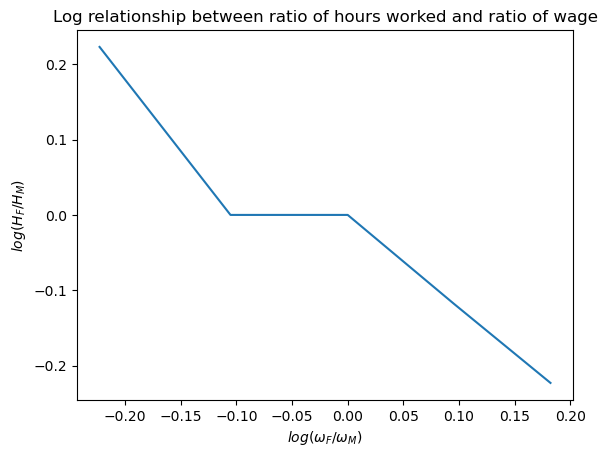

In [122]:
# e. illustrate the relationship between 'logratioH' and 'logratiow' for given wF using the 'plot_illustration' function
model.plot_illustration(plot_df)

From the above figure we see that as women's wages increases relative to men, then women's share of hours working at home decreases. But when wages of women are 0.9 and 1.0, then the relative hours worked at home are the same. This graph is done with $\alpha = 0.5$ and $\sigma= 1$, which means, that both partners are equally productive in domestic labour and their work is completely substitutable.

## Question 3

We plot the $log \space \frac{H_F}{H_M}$ against $log \space \frac{\omega_F}{\omega_M}$ for $\omega_F$ $\in [0.8, 0.9, 1.0, 1.1, 1.2]$ again, but this time the choice set is continuous, so $L_M, L_F, H_M, H_F \in [0,24]$. 

In [123]:
# a. construct empty lists to contain the log(HF/HM) and log(wF/wM) 
logratioHc=[]
logratiowc=[]

# b. loop over every wF, solve the model and adds the result to the empty lists 
for i in model.par.wF_vec:
    # i. set the wF = i
    model.par.wF = i
    # ii. use 'solve' from the class to find the results and store en 'resultsc'
    resultsc =model.solve()
    # iii. append the log(HF/HM) til the list 'logratioHc' 
    logratioHc.append(np.log(resultsc.HF/resultsc.HM))
    # iv. append the log(wF/wM) til the list 'logratiowc' 
    logratiowc.append(np.log(i/model.par.wM))

# c. construct a dataframe to contain H and w log ratios for every wF
plot_dfc = pd.DataFrame({"wf": model.par.wF_vec, "H ratio": np.round(logratioHc, 4), "w ratio": np.round(logratiowc, 4)})
plot_dfc

,wf,H ratio,w ratio
0,0.8,0.1443,-0.2231
1,0.9,0.0313,-0.1054
2,1.0,-0.0773,0.0000
3,1.1,-0.1369,0.0953
4,1.2,-0.1665,0.1823


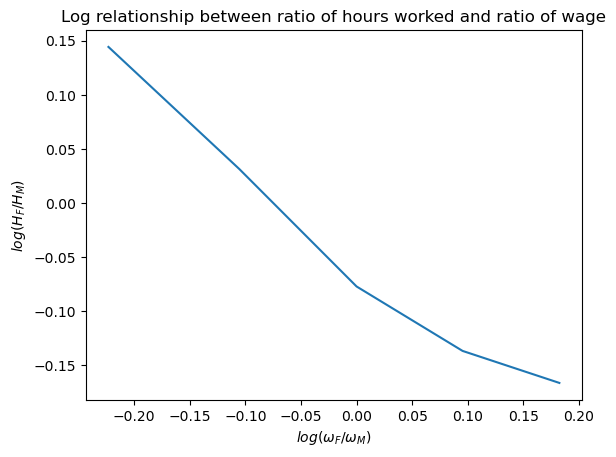

In [124]:
# d. illustrate the relationship between 'logratioH' and 'logratiow' for given wF using the 'plot_illustration' function
model.plot_illustration(plot_dfc)

From the above figure we see the same relationship as with discrete choices. However the graph is more smooth. The reason the graph is not completely smooth, is that the minimizer is very sensitive to the starting value. Here the values from the discrete model are chosen as starting values. The relationship presented in the graph is consistent with an $\alpha$ of 0.5, where each member of the couple is equally productive in the home production, further $\sigma = 1$, which means that the man and woman's work are completely interchangeable, and therefore it only makes sense to work different amounts at home, when the one part makes more in the market and therefore the ratio of home prodution follows the ratio of the wage almost perfectly, but are of course negative correlated. 

## Question 4

We choose $\alpha$ and $\sigma$ such that it minimizes $(\beta_0 - \hat{\beta}_0)^2 + (\beta_1 - \hat{\beta}_1)^2$. To illustrate, we plot the $log \space \frac{H_F}{H_M}$ against $log \space \frac{\omega_F}{\omega_M}$ for $\omega_F$ $\in [0.8, 0.9, 1.0, 1.1, 1.2]$. By default, we use the continuous values for $L_M, L_F, H_M$ and $H_F$.

/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/inauguralproject.py:69: RuntimeWarning: overflow encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/inauguralproject.py:69: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/inauguralproject.py:69: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


alpha = 0.9839273201856493
sigma = 0.09830109724352809


Text(0, 0.5, '$log(H_F/H_M)$')

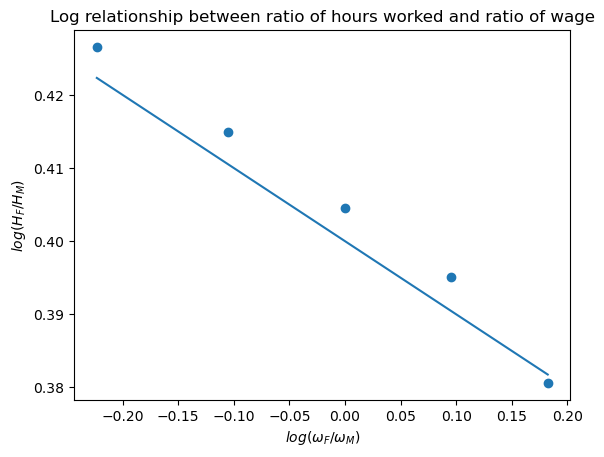

In [125]:
# a. use the 'estimate' function to estimate the optimal alpha and sigma 
model.estimate()

# b. find the log H ratio 
log_H_ratio = np.log(model.sol.HF_vec/model.sol.HM_vec)

# c. construct a figure to illustrate the relationship between log H ratio and log w ratio 
fig4 = plt.figure()
ax = fig4.add_subplot(1,1,1)
# d. add the 'log_H_ratio' and the weights as scatterplot 
ax.scatter(np.log(model.par.wF_vec),log_H_ratio)
# e. add the regression from the model 
ax.plot(np.log(model.par.wF_vec),model.par.beta0_target+model.par.beta1_target*np.log(model.par.wF_vec))
# f. set title and axis labels 
ax.set_title('Log relationship between ratio of hours worked and ratio of wage')
ax.set_xlabel('$log(\omega_F/\omega_M)$')
ax.set_ylabel('$log(H_F/H_M)$')

The model suggest a $\alpha$ value of 0.9839, and a $\sigma$ value of 0.0983 when fitted to the $\beta's$ suggested by the data. The $\alpha$ indicates that females are much more effective in the home production, but the $\sigma$ close to zero suggest that the substitution between female and male labour is almost without value. The positive value on the y-axis indicates that females do the largest part of the domestic labor no matter what the ratio of wages are. This is in line with the interpretation of the $\beta's$. The positive $\beta_{0}$ indicates that females do most of the home production, but the negative $\beta_{1}$ do however mean that the difference in domestic decreases as the woman's wage increase relative to the man's.


## Question 5

We assume that $\alpha = 0.5$ and estimate the model

In [126]:
# a. estimate model with alpha = 0.5
model.estimate(alpha=0.5)
# b. print results
print('When alpha = 0.5 then the model estimates the betas to be:')
print(f'beta0 = {model.sol.beta0}')
print(f'beta1 = {model.sol.beta1}')

When alpha = 0.5 then the model estimates the betas to be:
beta0 = -0.0021895302842286314
beta1 = -0.09077317763494856


When $\alpha = 0.5$ the model is not able to fit to the target $\beta's$. It hits close to $\beta_{1}$, which indicates that the effect of relative wage remains the same, but $\beta_{0}$ is far from the target estimate of 0.4, as it would not maximize utility for a couple with equal home productivity to let the woman do most of the domestic work.

We suggest an extension to the model which creates couples with children.
The couples with children will have a constraint on the distribution of home production.
The constraint implies that females must work 1.5 times at home compared to the males. The constraint is build on a more conservative sight upon family life, where most of the home production related to childcare is the mothers job. This is of course not always the case, but we expect it will reflect the data more accurately.

In order to implement the above, we enforce constraints depending on having children and add a further constraint to the couples maximasation problem. 
$H_{F} \geq 1.5* H_{M}$

We choose to look at couples with and withou children seperately, as to get a representative estimate we would need to weight the too couple types according to the share of couples actually having children

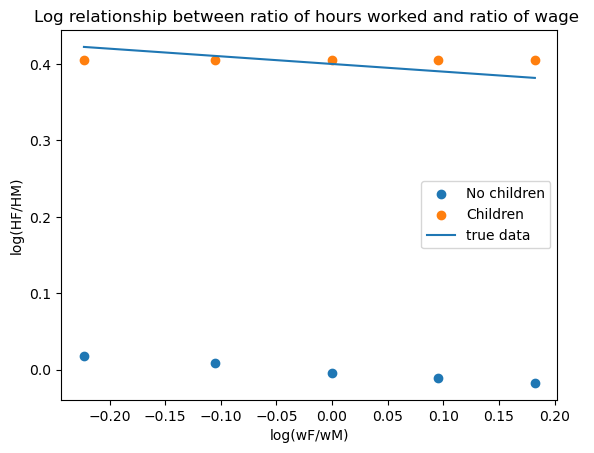

In [127]:
# a. dummy representing couple with or without children
children = [0,1]

# b. empty list for HF and HM in the following loop 
children_HF_vec= []
children_HM_vec= []
no_HF_vec = []
no_HM_vec = []

# c. loop over children dummy and use different constraints 
for i in children:
    # i. empty constraints list 
    model.par.constraints = []
    # ii. if no children 
    if i == 0:
        # o. no home production constraint 
        model.par.constraints = ({'type': 'ineq', 'fun': lambda x: 24 - (x[0]+x[1])},{'type': 'ineq', 'fun': lambda x: 24 - (x[2]+x[3])})
        # oo. estimate the model 
        model.estimate(alpha=0.5)
        # ooo. add the HF from the model estimation to 'no_HF_vec' 
        no_HF_vec.extend(model.sol.HF_vec)
        # oooo. add the HM from the model estimation to 'no_HM_vec' 
        no_HM_vec.extend(model.sol.HM_vec)
    # iii. if children   
    else:
        # o. women's home production is 1.5 times men's
        model.par.constraints = ({'type': 'ineq', 'fun': lambda x: 24 - (x[0]+x[1])},{'type': 'ineq', 'fun': lambda x: 24 - (x[2]+x[3])},{'type': 'ineq', 'fun': lambda x: (x[3]-1.5*x[1])})
        # oo. estimate the model 
        model.estimate(alpha=0.5)
        # ooo. add the HF from the model estimation to 'children_HF_vec' 
        children_HF_vec.extend(model.sol.HF_vec)
        # oooo. add the HM from the model estimation to 'children_HM_vec'
        children_HM_vec.extend(model.sol.HM_vec)

# d. make the H vectors arrays 
children_HF_vec= np.array(children_HF_vec)
children_HM_vec= np.array(children_HM_vec)
no_HF_vec = np.array(no_HF_vec)
no_HM_vec = np.array(no_HM_vec)

# f. make the log(wF/wM) and log(HF/HM)
x = np.log(model.par.wF_vec)
children_ratio = np.log(children_HF_vec/children_HM_vec)
no_children_ratio = np.log(no_HF_vec/no_HM_vec)

# g. make regression for each statement for children 
A = np.vstack([np.ones(x.size),x]).T
c_beta0,c_beta1 = np.linalg.lstsq(A,children_ratio,rcond=None)[0]
A = np.vstack([np.ones(x.size),x]).T
nc_beta0,nc_beta1 = np.linalg.lstsq(A,no_children_ratio,rcond=None)[0]

# h. make the figure and plot 
fig_children = plt.figure()
ax = fig_children.add_subplot(1,1,1)
ax.scatter(np.log(model.par.wF_vec),no_children_ratio, label= "No children")
ax.scatter(np.log(model.par.wF_vec),children_ratio,label= "Children")

ax.plot(np.log(model.par.wF_vec),model.par.beta0_target+model.par.beta1_target*np.log(model.par.wF_vec), label = "true data")
ax.set_title('Log relationship between ratio of hours worked and ratio of wage ')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)');
ax.legend()

The above figure indicates that our extention for couples with children match the 'true' data better that the one without children (the original model with $\alpha =0.5$). But let us look into the $\beta$ values, to get the full story. 

In [128]:
#a. print
print('When couples have children then the betas are:')
print(f'beta0 = {c_beta0}')
print(f'beta1 = {c_beta1}\n')

model.estimate(alpha=0.5)
print('When couples have no children then the betas are:')
print(f'beta0 = {nc_beta0}')
print(f'beta1 = {nc_beta1}')

When couples have children then the betas are:
beta0 = 0.40546510810816433
beta1 = 9.464661459255228e-17

When couples have no children then the betas are:
beta0 = -0.0021895302842286314
beta1 = -0.09077317763494856


From the above $\beta's$, we see that when women have a home production 1.5 times men's then we have a simiular interaction terms to the 'true' data, but the slope is more flat. While for the situation with no children, equivalent to just $\alpha = 0.5$, has a simiular slope, but the interaction term is way lower. This indicates that while the constraint took care of the low level of the interaction term. It does however no longer show the same effect of a change in the releative wage. As the female needs to do more of the home production, her relative wage do not matter as $\beta_{1}$ is very close to zero. The extenstion therefore did not really fit the data better than the original model, but fit in another way one could say.

